<a href="https://colab.research.google.com/github/Seongjin1225/AI-School-9_Mid_Project_Team2/blob/main/Mid_Project_%EC%A0%84%EC%B2%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,848 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc

In [ ]:
# 3개 데이터 통합 시키기
import pandas as pd
import glob

# 서울 - 서울
data1 = glob.glob(r'/content/drive/MyDrive/Mid_Project/서울-서울/from_to_seoul_*.csv')
data1.sort(reverse=True)

head_df = pd.read_csv('/content/drive/MyDrive/Mid_Project/서울-서울/from_to_seoul_2309.csv', encoding='cp949')
col = head_df.columns
from_to_seoul = pd.DataFrame()

for file in data1:
    df = pd.read_csv(file, encoding='cp949')
    df.columns = col
    from_to_seoul = pd.concat([from_to_seoul, df])

# 서울 - 전국
data2 = glob.glob(r'/content/drive/MyDrive/Mid_Project/서울-전국/from_seoul_*.csv')
data2.sort(reverse=True)

head_df2 = pd.read_csv('/content/drive/MyDrive/Mid_Project/서울-전국/from_seoul_2309.csv', encoding='cp949')
col2 = head_df2.columns
from_to_seoul = pd.DataFrame()

for file in data2:
    df2 = pd.read_csv(file, encoding='cp949')
    df2.columns = col2
    from_seoul = pd.concat([from_to_seoul, df2])

# 전국 - 서울
data3 = glob.glob(r'/content/drive/MyDrive/Mid_Project/전국-서울/to_seoul_*.csv')
data3.sort(reverse=True)

head_df3 = pd.read_csv('/content/drive/MyDrive/Mid_Project/전국-서울/to_seoul_2309.csv', encoding='cp949')
col3 = head_df3.columns
to_seoul = pd.DataFrame()

for file in data3:
    df3 = pd.read_csv(file, encoding='cp949')
    df3.columns = col3
    to_seoul = pd.concat([to_seoul, df3])

# 데이터 프레임 합치기 & 수정 + 삭제
# 전체 배송량 분석이므로 목적지는 없어도 된다고 판단
data = pd.concat([from_to_seoul, from_seoul, to_seoul],axis=0, ignore_index=True)
data.drop(['송하인_시명', '송하인_시코드','송하인_구명','송하인_구코드', '수하인_시명', '수하인_시코드', '수하인_구명','수하인_구코드'],
          axis=1,inplace=True)
data.head()

name = {
    '대분류_착지물동량 가구/인테리어': '가구/인테리어',
    '대분류_착지물동량 기타': '기타',
    '대분류_착지물동량 도서/음반': '도서/음반',
    '대분류_착지물동량 디지털/가전': '디지털/가전',
    '대분류_착지물동량 생활/건강': '생활/건강',
    '대분류_착지물동량 스포츠/레저': '스포츠/레저',
    '대분류_착지물동량 식품': '식품',
    '대분류_착지물동량 출산/육아': '출산/육아',
    '대분류_착지물동량 패션의류': '패션의류',
    '대분류_착지물동량 패션잡화': '패션잡화',
    '대분류_착지물동량 화장품/미용': '화장품/미용'
}
data.rename(columns = name, inplace=True)
data.head()

,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,20210108,199.0,920.0,132.0,301.0,891.0,217.0,519.0,128.0,1016.0,311.0,324.0
1,20210108,60.0,171.0,22.0,66.0,228.0,74.0,127.0,45.0,269.0,96.0,98.0
2,20210108,42.0,118.0,30.0,52.0,156.0,39.0,118.0,36.0,197.0,52.0,53.0
3,20210108,73.0,221.0,35.0,65.0,230.0,73.0,162.0,49.0,303.0,80.0,89.0
4,20210108,22.0,86.0,15.0,36.0,98.0,30.0,81.0,23.0,140.0,39.0,46.0


In [ ]:
# 완성된 데이터 프레임 다듬기
# 배송년월일 data type 변경
data['배송년월일'] = data['배송년월일'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
data.head()

# 총합 컬럼 추가
data['총합'] = data.sum(axis=1)
data.head()

# 날짜로 그룹화하여 합치기
data = data.groupby('배송년월일').sum().reset_index()
data

<ipython-input-2-e7a04bae5020>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['총합'] = data.sum(axis=1)


,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총합
0,2021-01-01,451.0,5768.0,42799.0,4951.0,6976.0,1694.0,19091.0,4388.0,4224.0,2931.0,5587.0,98860.0
1,2021-01-02,8316.0,79760.0,68407.0,27743.0,65614.0,9566.0,104217.0,25908.0,109448.0,42736.0,37292.0,579007.0
2,2021-01-03,9582.0,11242.0,54352.0,14032.0,48505.0,2417.0,176128.0,7144.0,29375.0,9293.0,37962.0,400032.0
3,2021-01-04,172385.0,605196.0,233436.0,477622.0,899176.0,106282.0,988261.0,115186.0,699397.0,322270.0,439400.0,5058611.0
4,2021-01-05,96429.0,385939.0,175853.0,280123.0,501299.0,51906.0,609060.0,78011.0,461329.0,209009.0,223613.0,3072571.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2023-09-26,15848.0,63706.0,34301.0,37968.0,90572.0,15993.0,107220.0,14777.0,148675.0,53018.0,63562.0,645640.0
999,2023-09-27,6758.0,28233.0,17314.0,15345.0,37278.0,5867.0,52940.0,6781.0,79076.0,29047.0,34738.0,313377.0
1000,2023-09-28,324.0,2236.0,217.0,1482.0,1488.0,875.0,2363.0,357.0,2981.0,4036.0,1501.0,17860.0
1001,2023-09-29,0.0,0.0,0.0,0.0,0.0,0.0,567.0,0.0,0.0,0.0,0.0,567.0


In [ ]:
# 이상치 처리(22년 1월 데이터)
df = data[data['배송년월일'].between('2022-01-01','2022-01-31')]
df.drop(['배송년월일','총합'],axis=1,inplace=True)

column_list = df.columns  # 반복할 품목명
pct = [0.024, 0.141, 0.043, 0.073, 0.139, 0.021, 0.184, 0.021, 0.202, 0.077, 0.076]  # 품목별 퍼센트
oth = df['기타']  # 기준이 될 행
count = 0
for col in column_list:
    df[col] = (oth*pct[count]).astype(int)
    count += 1

df

# 적용
data.iloc[365:396, 1:12] = df
data[data['배송년월일'].between('2022-01-01','2022-01-31')]

<ipython-input-3-e8bc87c17db6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['배송년월일','총합'],axis=1,inplace=True)
<ipython-input-3-e8bc87c17db6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (oth*pct[count]).astype(int)


,배송년월일,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총합
365,2022-01-01,1078.0,6336.0,1932.0,3280.0,6246.0,943.0,8268.0,943.0,9077.0,3460.0,3415.0,44938.0
366,2022-01-02,4772.0,28038.0,8550.0,14516.0,27641.0,4176.0,36589.0,4176.0,40169.0,15312.0,15113.0,198858.0
367,2022-01-03,45412.0,266796.0,81363.0,138128.0,263012.0,39735.0,348160.0,39735.0,382219.0,145697.0,143805.0,1892196.0
368,2022-01-04,29169.0,171368.0,52261.0,88722.0,168937.0,25522.0,223629.0,25522.0,245506.0,93584.0,92368.0,1218620.0
369,2022-01-05,14446.0,84871.0,25882.0,43940.0,83667.0,12640.0,110754.0,12640.0,121589.0,46348.0,45746.0,1124647.0
370,2022-01-06,26008.0,152797.0,46597.0,79107.0,150630.0,22757.0,199395.0,22757.0,218901.0,83442.0,82358.0,1083670.0
371,2022-01-07,24329.0,142934.0,43590.0,74001.0,140907.0,21288.0,186524.0,21288.0,204771.0,78056.0,77042.0,1013722.0
372,2022-01-08,4180.0,24560.0,7489.0,12715.0,24211.0,3657.0,32050.0,3657.0,35185.0,13412.0,13238.0,174185.0
373,2022-01-09,4630.0,27204.0,8296.0,14084.0,26819.0,4051.0,35501.0,4051.0,38974.0,14856.0,14663.0,192943.0
374,2022-01-10,43298.0,254381.0,77577.0,131701.0,250773.0,37886.0,331958.0,37886.0,364433.0,138917.0,137113.0,1804124.0


# 명절 연휴 카테고리 분석

<ipython-input-4-32dc33222e04>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2021.drop(['총합'],axis=1, inplace=True)
<ipython-input-4-32dc33222e04>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2022.drop(['총합'],axis=1, inplace=True)
<ipython-input-4-32dc33222e04>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2023.drop(['총합'],axis=1, inplace=True)


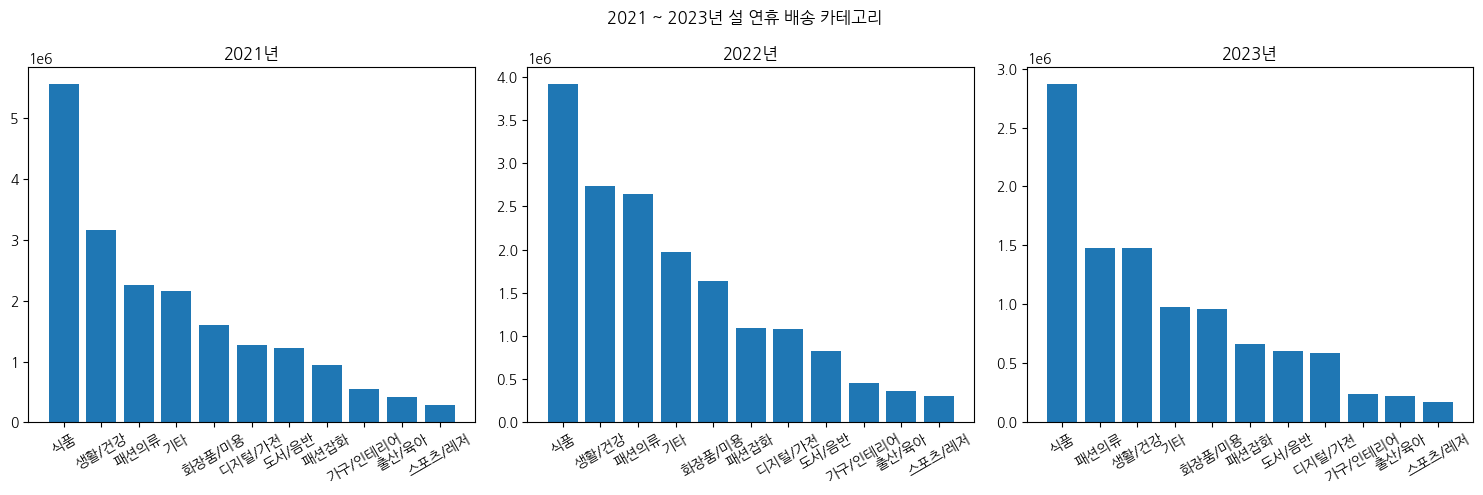

In [ ]:
# 2021년 설 연휴 전후 --> 2021-02-01 ~ 2021-02-21
# 2022년 설 연휴 전후 --> 2022-01-24 ~ 2022-02-13
# 2023년 설 연휴 전후 --> 2023-01-16 ~ 2023-01-29

# 라이브러리 호출
import matplotlib.pyplot as plt

# 필요 데이터 추출
con_2021 = data['배송년월일'].between('2021-02-01', '2021-02-21')
new_2021 = data[con_2021]

con_2022 = data['배송년월일'].between('2022-01-24', '2022-02-13')
new_2022 = data[con_2022]

con_2023 = data['배송년월일'].between('2023-01-16', '2023-01-29')
new_2023 = data[con_2023]

# 데이터 전처리

new_2021.drop(['총합'],axis=1, inplace=True)
stat_2021 = new_2021.groupby('배송년월일').sum()
stat_1 = stat_2021.sum().sort_values(ascending=False)

new_2022.drop(['총합'],axis=1, inplace=True)
stat_2022 = new_2022.groupby('배송년월일').sum()
stat_2 = stat_2022.sum().sort_values(ascending=False)

new_2023.drop(['총합'],axis=1, inplace=True)
stat_2023 = new_2023.groupby('배송년월일').sum()
stat_3 = stat_2023.sum().sort_values(ascending=False)

# 시각화
fig = plt.figure(figsize=(15,5))
plt.rc('font', family='NanumGothic')
plt.suptitle('2021 ~ 2023년 설 연휴 배송 카테고리')

fig.add_subplot(1,3,1)
plt.title('2021년')
plt.bar(stat_1.index, stat_1.values)
plt.xticks(rotation=30)

fig.add_subplot(1,3,2)
plt.title('2022년')
plt.bar(stat_2.index, stat_2.values)
plt.xticks(rotation=30)

fig.add_subplot(1,3,3)
plt.title('2023년')
plt.bar(stat_3.index, stat_3.values)
plt.xticks(rotation=30)

plt.tight_layout()

<ipython-input-5-7af986a73b1c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holi_2021.drop(['총합'],axis=1, inplace=True)
<ipython-input-5-7af986a73b1c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holi_2022.drop(['총합'],axis=1, inplace=True)
<ipython-input-5-7af986a73b1c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holi_2023.drop(['총합'],axis=1, inplace=True)


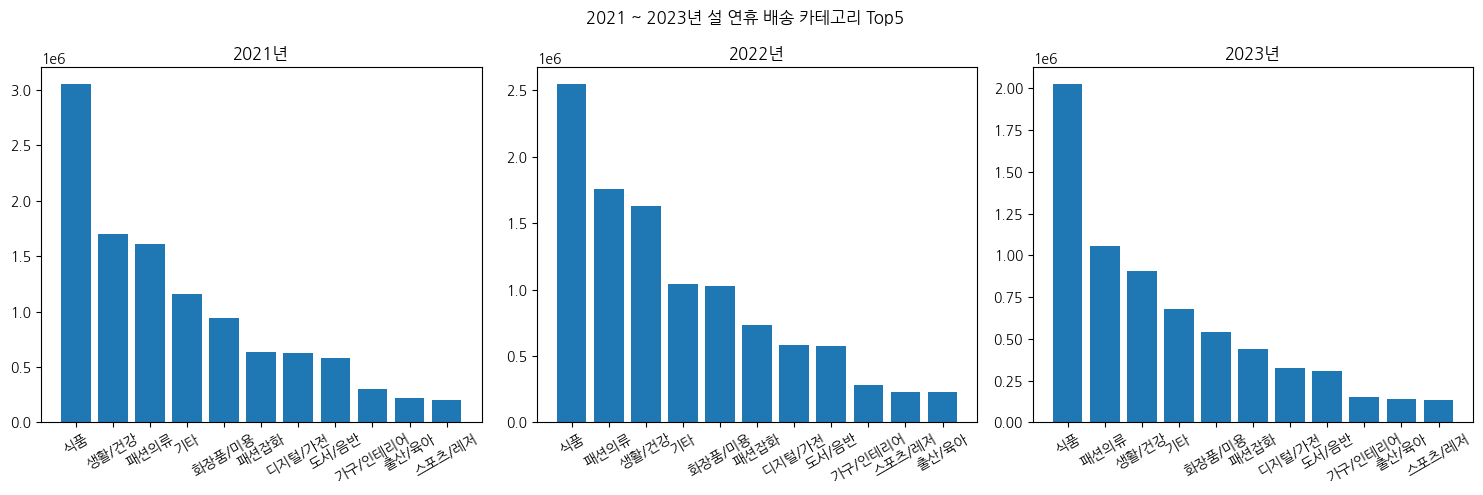

In [ ]:
# 명절 연휴(추석)
# 기간 정하기

# 2021년 추석 연휴 -> 2021-09-13 ~ 2021-09-25
# 2022년 추석 연휴 -> 2022-09-05 ~ 2021-09-16
# 2023년 추석 연휴 -> 2023-09-20 ~ 2023-09-27

# 필요 데이터 추출
cond_2021 = data['배송년월일'].between('2021-09-13', '2021-09-25')
holi_2021 = data[cond_2021]

cond_2022 = data['배송년월일'].between('2022-09-05', '2022-09-16')
holi_2022 = data[cond_2022]

cond_2023 = data['배송년월일'].between('2023-09-20', '2023-09-27')
holi_2023 = data[cond_2023]

# 데이터 전처리
holi_2021.drop(['총합'],axis=1, inplace=True)
stats_2021 = holi_2021.groupby('배송년월일').sum()
stats_1 = stats_2021.sum().sort_values(ascending=False)

holi_2022.drop(['총합'],axis=1, inplace=True)
stats_2022 = holi_2022.groupby('배송년월일').sum()
stats_2 = stats_2022.sum().sort_values(ascending=False)

holi_2023.drop(['총합'],axis=1, inplace=True)
stats_2023 = holi_2023.groupby('배송년월일').sum()
stats_3 = stats_2023.sum().sort_values(ascending=False)

# 시각화
fig = plt.figure(figsize=(15,5))
plt.rc('font', family='NanumGothic')
plt.suptitle('2021 ~ 2023년 설 연휴 배송 카테고리 Top5')

fig.add_subplot(1,3,1)
plt.title('2021년')
plt.bar(stats_1.index, stats_1.values)
plt.xticks(rotation=30)

fig.add_subplot(1,3,2)
plt.title('2022년')
plt.bar(stats_2.index, stats_2.values)
plt.xticks(rotation=30)

fig.add_subplot(1,3,3)
plt.title('2023년')
plt.bar(stats_3.index, stats_3.values)
plt.xticks(rotation=30)

plt.tight_layout()

# 블랙 프라이데이 기간

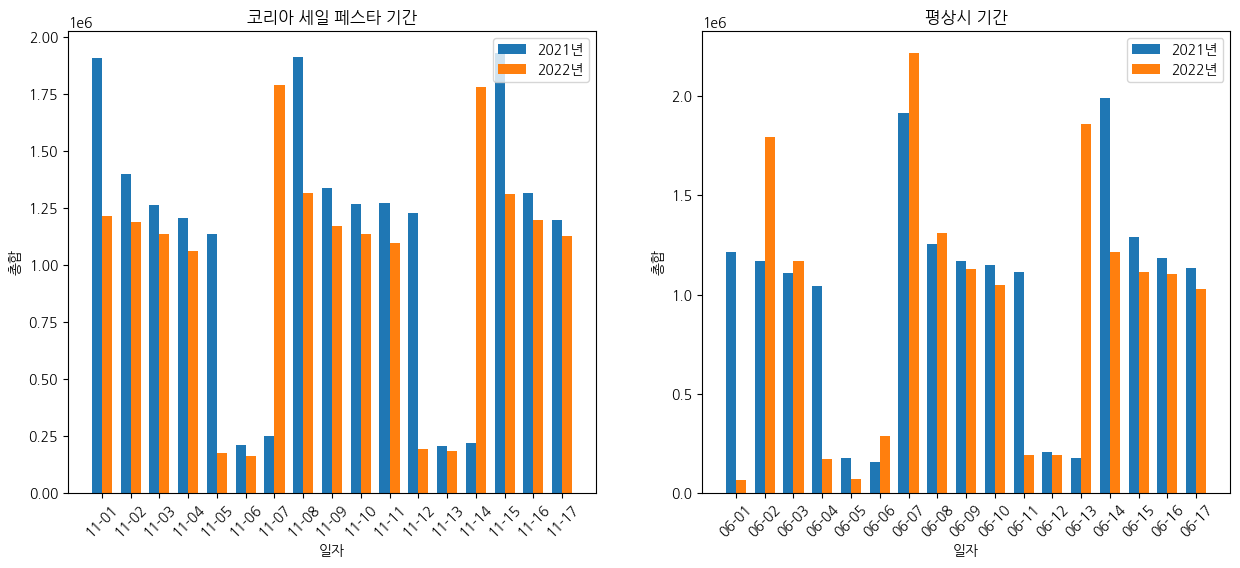

In [ ]:
# 국내 지역 데이터 이므로 코리아 세일 페스타 기간으로 설정

# 기간 설정
# 2021년 --> 2021-11-15 ~ 2021-11-15 (택배 배송 고려해서 17일까지)
# 2022년 --> 2022-11-01 ~ 2022-11-15 (택배 배송 고려해서 17일까지)
# 2023년은 9월 데이터까지 밖에 없는 관계로 제외

# 데이터 전처리

# 페스타 기간
period = data['배송년월일'].between('2021-11-01', '2021-11-17')
sale_1 = data[period][['배송년월일','총합']]

period_2 = data['배송년월일'].between('2022-11-01', '2022-11-17')
sale_2 = data[period_2][['배송년월일','총합']]

# 페스타 기간 아닌 일반 기간
period_3 = data['배송년월일'].between('2021-06-01', '2021-06-17')
not_sale = data[period_3][['배송년월일','총합']]

period_4 = data['배송년월일'].between('2022-06-01', '2022-06-17')
not_sale_2 = data[period_4][['배송년월일','총합']]

# 시각화
import numpy as np
fig = plt.figure(figsize=(15, 6))
bar_width = 0.35
index = np.arange(len(sale_1))

fig.add_subplot(1,2,1)
bar1 = plt.bar(index, sale_1['총합'], bar_width, label='2021년')
bar2 = plt.bar(index + bar_width, sale_2['총합'], bar_width, label='2022년')
plt.title('코리아 세일 페스타 기간')
plt.xlabel('일자')
plt.ylabel('총합')
plt.xticks(index + bar_width / 2, sale_1['배송년월일'].dt.strftime('%m-%d'), rotation=45)
plt.legend()

fig.add_subplot(1,2,2)
bar1 = plt.bar(index, not_sale['총합'], bar_width, label='2021년')
bar2 = plt.bar(index + bar_width, not_sale_2['총합'], bar_width, label='2022년')
plt.title('평상시 기간')
plt.xlabel('일자')
plt.ylabel('총합')
plt.xticks(index + bar_width / 2, not_sale['배송년월일'].dt.strftime('%m-%d'), rotation=45)
plt.legend()



In [ ]:
# 코세페 기간 카테고리 순위

# 라이브러리 호출
import numpy as np

# 데이터 전처리
# 페스타 기간
period = data['배송년월일'].between('2021-11-01', '2021-11-17')
sale_1 = data[period].sum()

period_2 = data['배송년월일'].between('2022-11-01', '2022-11-17')
sale_2 = data[period_2].sum()

# 페스타 기간 아닌 일반 기간
period_3 = data['배송년월일'].between('2021-06-01', '2021-06-17')
not_sale = data[period_3].sum()

period_4 = data['배송년월일'].between('2022-06-01', '2022-06-17')
not_sale_2 = data[period_4].sum()

sale_1 = sale_1.drop(['총합'])
sale_2 = sale_2.drop(['총합'])
not_sale = not_sale.drop(['총합'])
not_sale_2 = not_sale_2.drop(['총합'])

# 시각화
fig = plt.figure(figsize=(15, 6))
cate = len(sale_1)
bar_width = 0.35
index = np.arange(cate)

fig.add_subplot(1,2,1)
bar1 = plt.bar(index, sale_1.values, bar_width, label='2021년')
bar2 = plt.bar(index + bar_width, sale_2.values, bar_width, label='2022년')
plt.title('코리아 세일 페스타 기간')
plt.xlabel('카테고리')
plt.ylabel('총합')
plt.xticks(index + bar_width / 2, sale_1.index,rotation=45)
plt.legend()

fig.add_subplot(1,2,2)
plt.bar(index, not_sale.values, bar_width, label='2021년')
plt.bar(index + bar_width, sale_2.values, bar_width, label='2022년')
plt.title('평상시 기간')
plt.xlabel('카테고리')
plt.ylabel('총합')
plt.xticks(index + bar_width / 2, sale_1.index,rotation=45)
plt.legend()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0_vgh2t/x7cvux9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0_vgh2t/f48yd40t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14198', 'data', 'file=/tmp/tmpk0_vgh2t/x7cvux9p.json', 'init=/tmp/tmpk0_vgh2t/f48yd40t.json', 'output', 'file=/tmp/tmpk0_vgh2t/prophet_modeljrxe9p6z/prophet_model-20231121130651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:51 - cmdstanpy - INFO - Ch

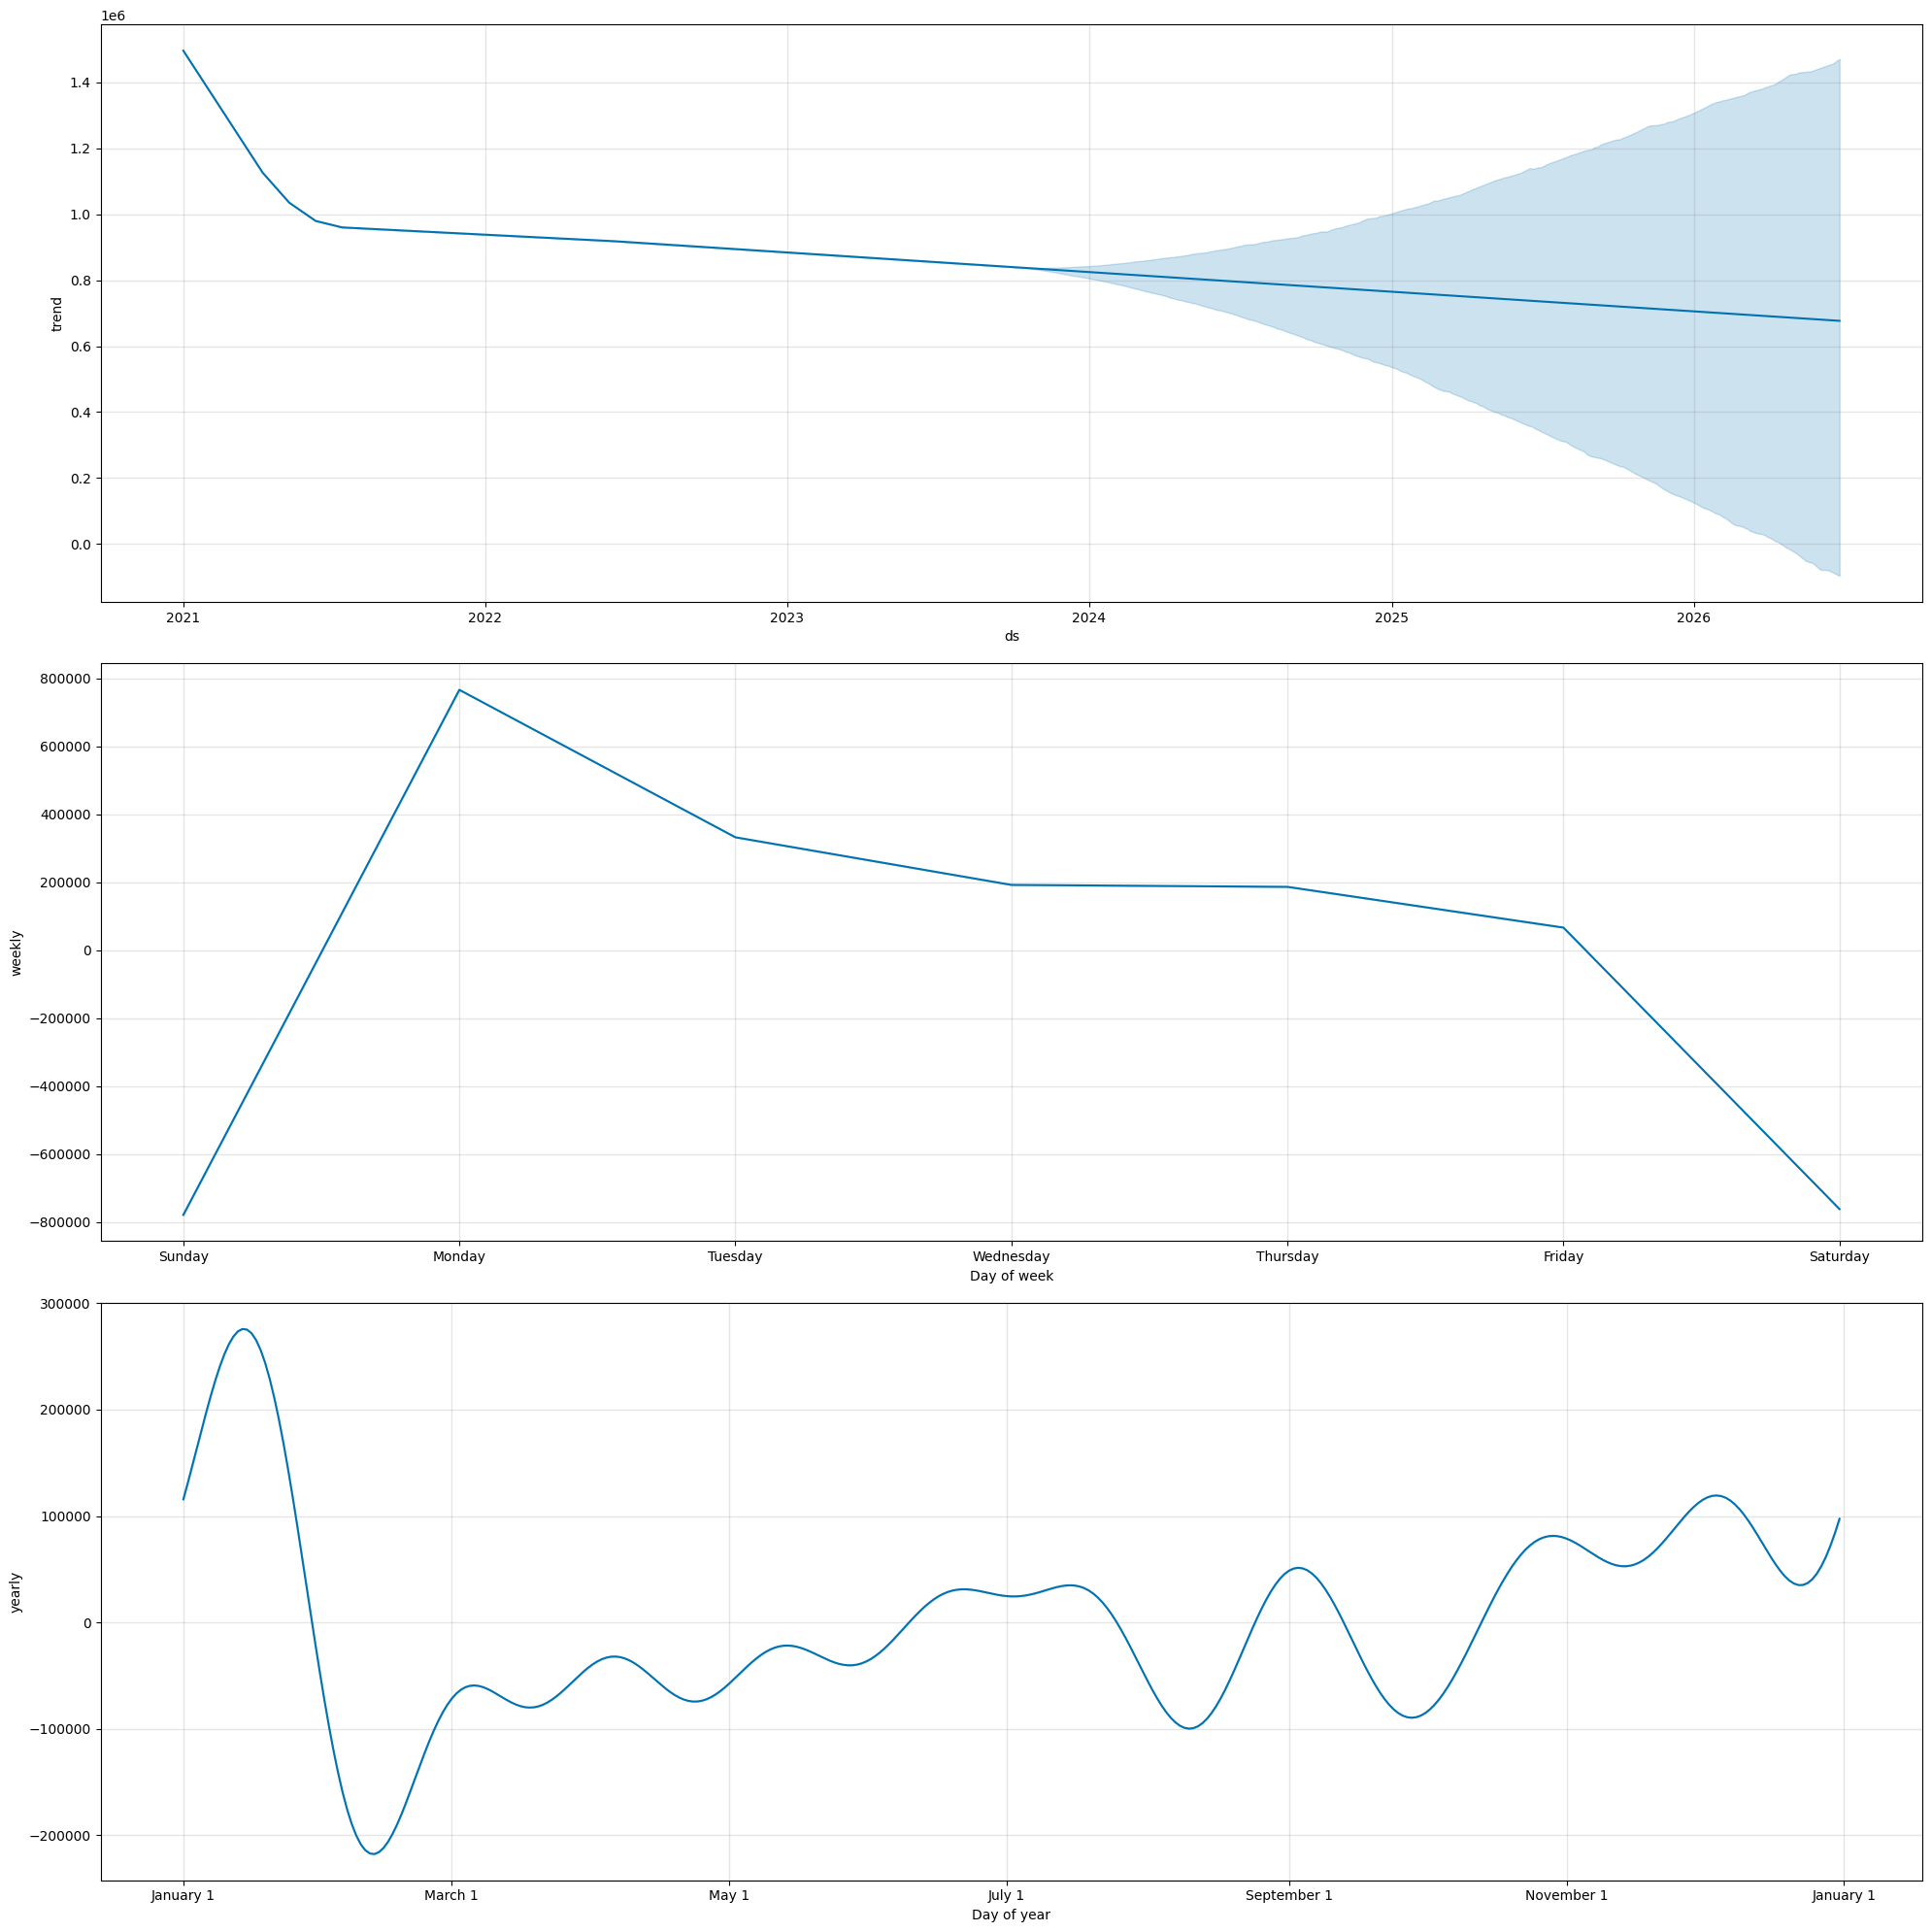

In [ ]:
# 기간별 배송량 가지고 향후 평균 배송량 예측하기
from prophet import Prophet
df = data[['배송년월일','총합']]
df.rename(columns={'배송년월일':'ds', '총합':'y'},inplace=True)

m = Prophet()
# m.add_country_holidays(country_name='KR')

m.fit(df)

future = m.make_future_dataframe(periods=1000)

forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper', 'yhat_lower']].tail()

fig = m.plot_components(forecast, figsize=(20,20))



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0_vgh2t/pw8qqlbc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0_vgh2t/qtek5jw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66591', 'data', 'file=/tmp/tmpk0_vgh2t/pw8qqlbc.json', 'init=/tmp/tmpk0_vgh2t/qtek5jw6.json', 'output', 'file=/tmp/tmpk0_vgh2t/prophet_model86ysiqqe/prophet_model-20231121130443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:43 - cmdstanpy - INFO - Ch

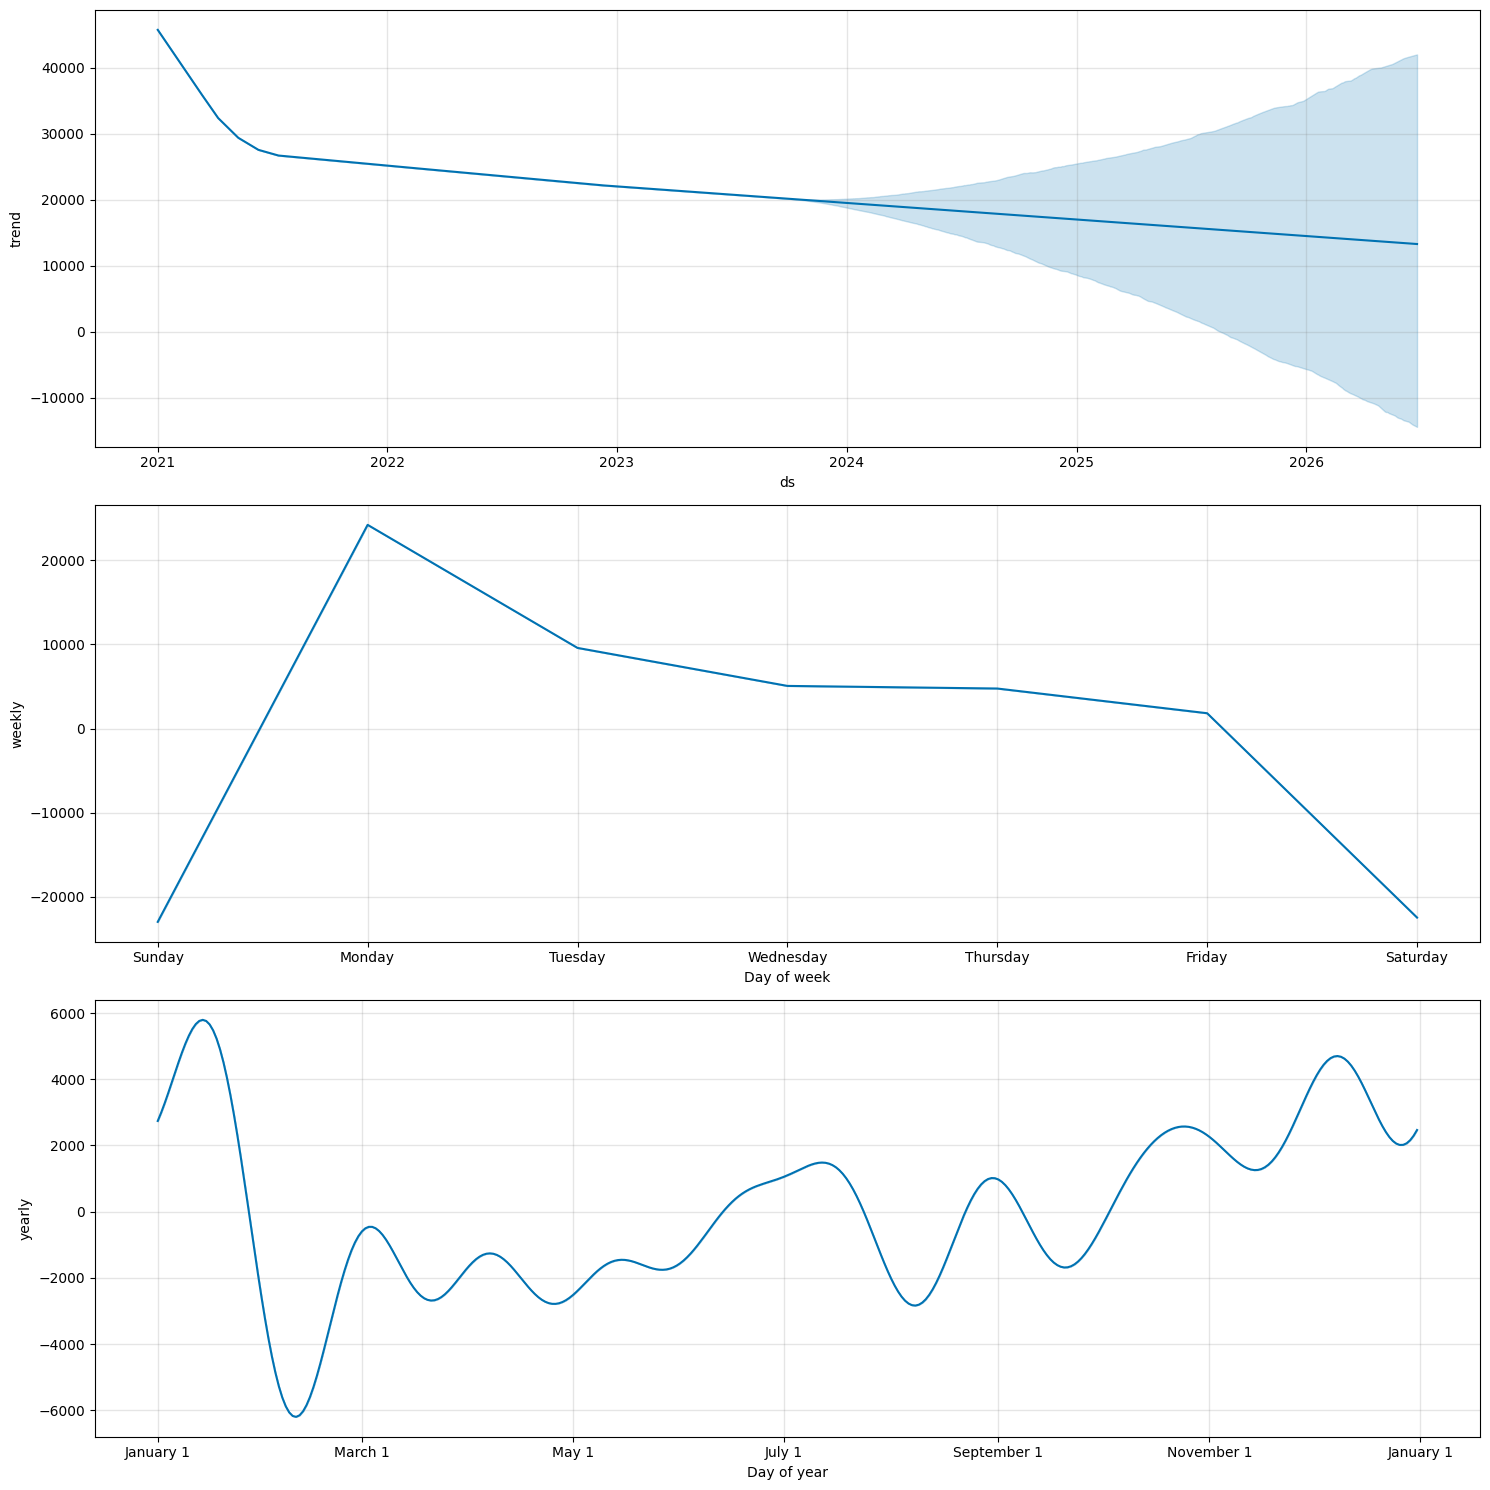

In [ ]:
# 전체 데이터 카테고리별 기계 학습
from prophet import Prophet

# 데이터 추출 및 전처리
df1 = data[['배송년월일','가구/인테리어']]
df1.rename(columns={'배송년월일':'ds', '가구/인테리어':'y'},inplace=True)
df1

# 객체 생성
m1 = Prophet()

# 학습
m1.fit(df1)

# 예측하기
future1 = m1.make_future_dataframe(periods=1000)
forecast1 = m1.predict(future1)
forecast1[['ds','yhat','yhat_upper', 'yhat_lower']].tail()

# 시각화
fig1 = m1.plot_components(forecast1, figsize=(15,15))

# change point 시각화
# uncertainty_df = forecast1.tail(50)
# uncertainty_df = forecast1[['yhat', 'yhat_lower','yhat_upper']]
# uncertainty_df['y'] = df1.tail(50)['y']
# uncertainty_df.plot()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0_vgh2t/d7a8hg3r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0_vgh2t/aojx3l5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71848', 'data', 'file=/tmp/tmpk0_vgh2t/d7a8hg3r.json', 'init=/tmp/tmpk0_vgh2t/aojx3l5i.json', 'output', 'file=/tmp/tmpk0_vgh2t/prophet_modelr0el1nvw/prophet_model-20231121130719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:19 - cmdstanpy - INFO - Ch

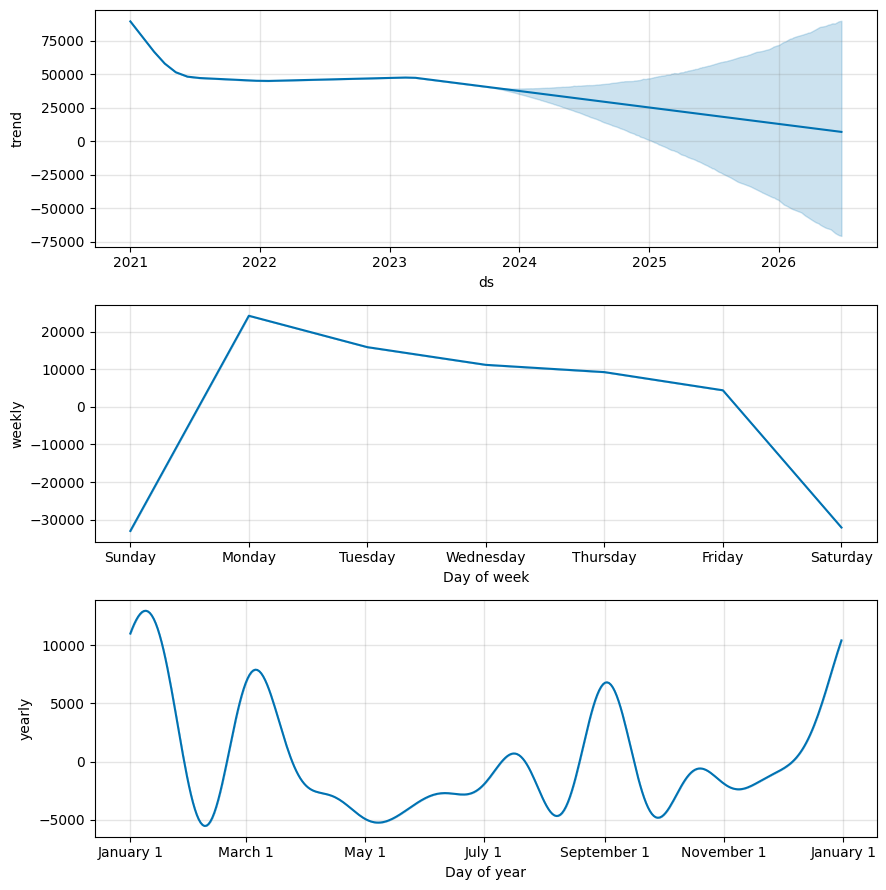

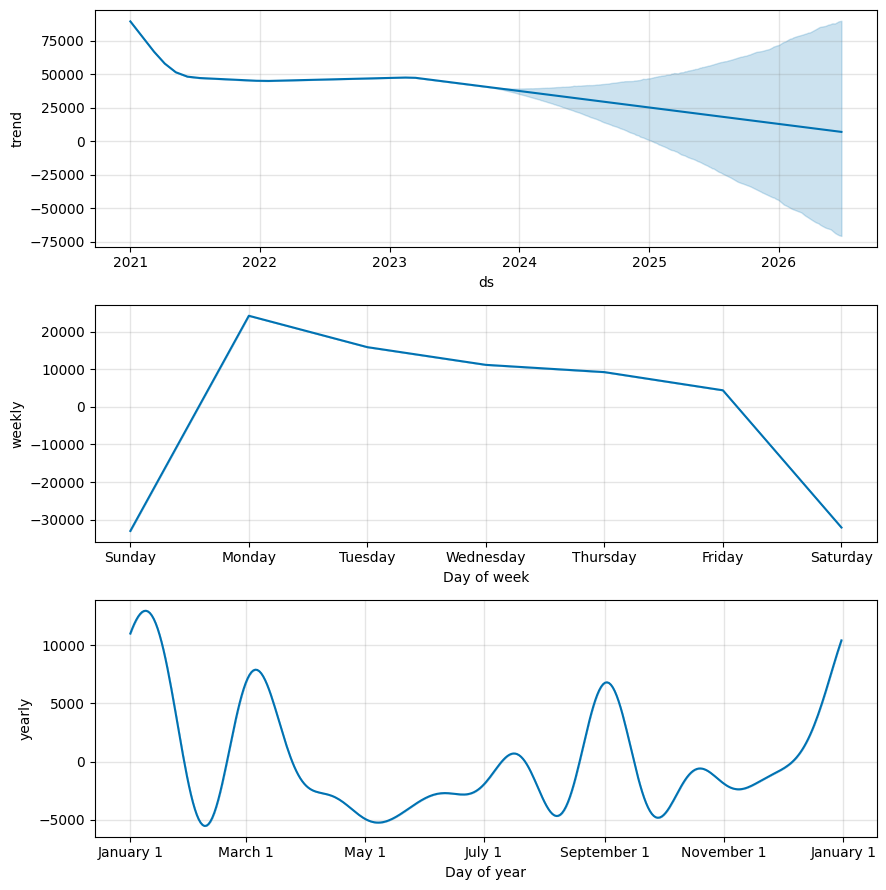

In [ ]:
# 전체 데이터 카테고리별 기계 학습
from prophet import Prophet

# 데이터 추출 및 전처리
df2 = data[['배송년월일','도서/음반']]
df2.rename(columns={'배송년월일':'ds', '도서/음반':'y'},inplace=True)
df2

# 객체 생성
m2 = Prophet()

# 학습
m2.fit(df2)

# 예측하기
future2 = m2.make_future_dataframe(periods=1000)
forecast2 = m2.predict(future2)
forecast2[['ds','yhat','yhat_upper', 'yhat_lower']].tail

# 시각화
# from prophet.plot import plot_yearly
# plot_yearly(m2)
m2.plot_components(forecast2)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0_vgh2t/vcxy8eew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0_vgh2t/0ceg65ba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56370', 'data', 'file=/tmp/tmpk0_vgh2t/vcxy8eew.json', 'init=/tmp/tmpk0_vgh2t/0ceg65ba.json', 'output', 'file=/tmp/tmpk0_vgh2t/prophet_modelpxmzd446/prophet_model-20231121130756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Ch

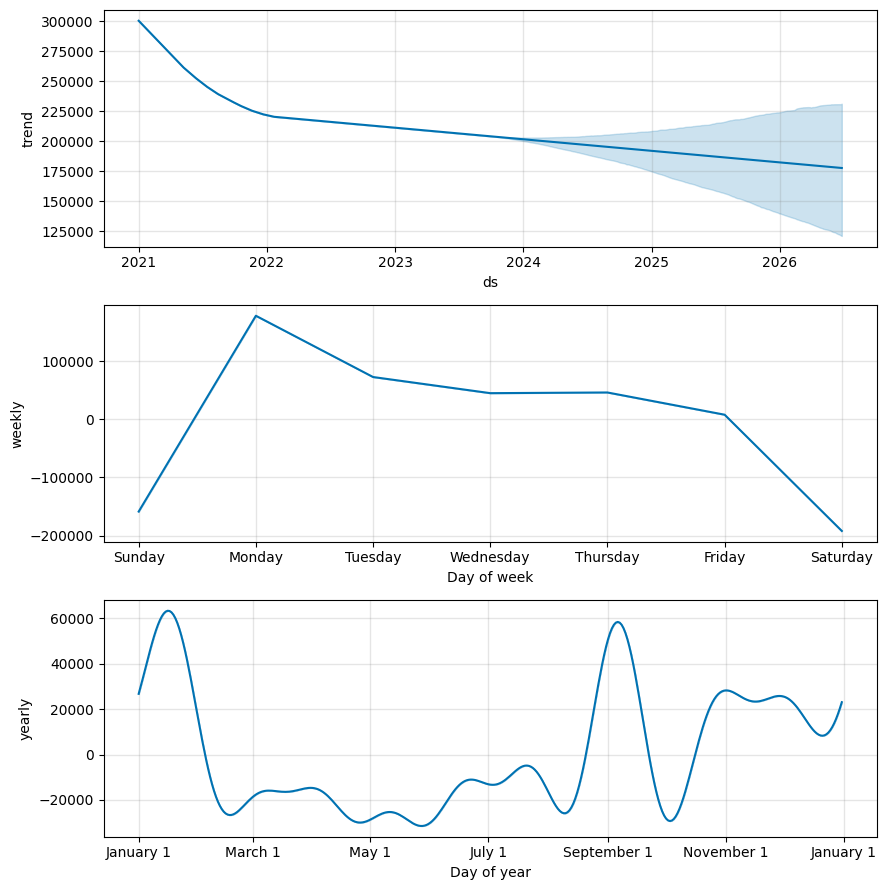

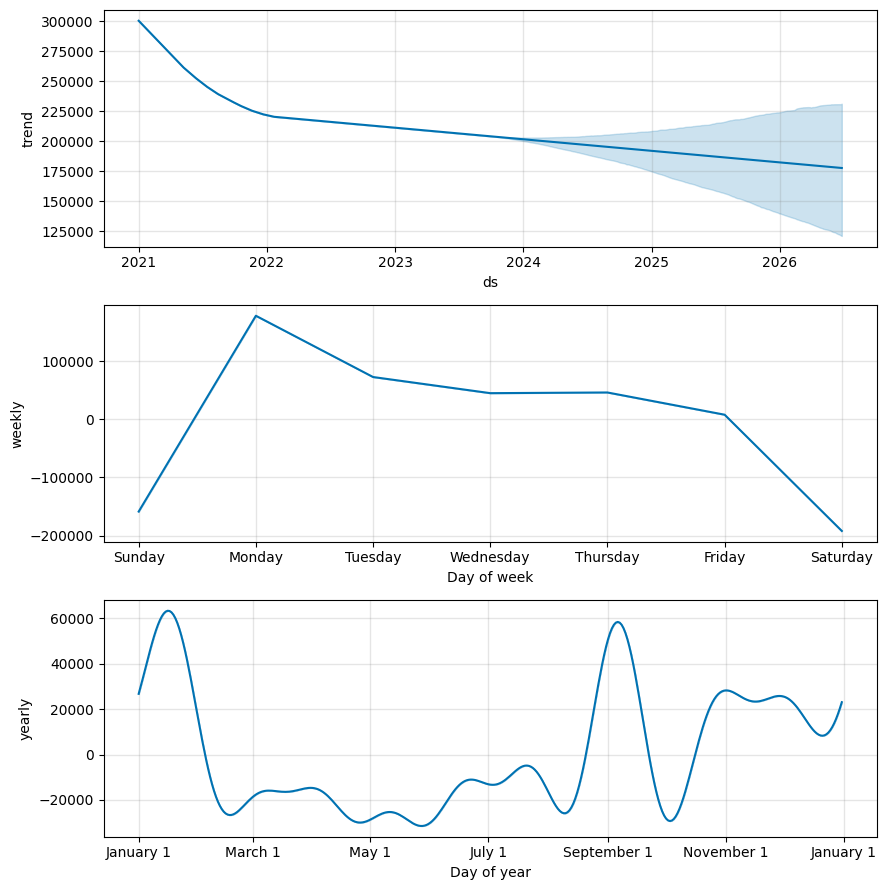

In [ ]:
# 전체 데이터 카테고리별 기계 학습
from prophet import Prophet

# 데이터 추출 및 전처리
df2 = data[['배송년월일','식품']]
df2.rename(columns={'배송년월일':'ds', '식품':'y'},inplace=True)
df2

# 객체 생성
m2 = Prophet()

# 학습
m2.fit(df2)

# 예측하기
future2 = m2.make_future_dataframe(periods=1000)
forecast2 = m2.predict(future2)
forecast2[['ds','yhat','yhat_upper', 'yhat_lower']].tail

# 시각화
# from prophet.plot import plot_yearly
# plot_yearly(m2)
m2.plot_components(forecast2)